## Final Project for Programming Analytics
## Submitted by 
## Niteesh Kanungo - Niteesh2@illinois.edu
## Pradeep Kumar 

In [1]:
#Importing Libraries for the Project 
import pandas as pd 
import datetime 
import numpy as np
import scipy.stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import DataFrame
import itertools

#Type plot - XKCD 
#plt.xkcd()

#plotting inline
%matplotlib inline

In [2]:
%%javascript
//This function is used to Plot Graph in Jupyter with keeping Autoscrolling off.
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

In [3]:
#Start date and End date is refers to time period for fetching the data using the Pandas dataframe API
#We have selected data for atleast 2 years to include variability due to seasoning and external conditions over the period of time
start_date = datetime.datetime(2015, 12, 5)
end_date = datetime.datetime(2017, 12, 5)

Fetching Data for the individual Crypto-Currency in individual blocks to make sure they are loaded properly without any errors

In [4]:
#Bitcion to USD Trading Data
BTC_USD = web.DataReader("BTC-USD", "yahoo", start_date, end_date)
BTC_USD.to_csv("BTC_USD.csv")

In [5]:
#Ethereium to USD Trading Data
ETH_USD = web.DataReader("ETH-USD", "yahoo", start_date, end_date)
ETH_USD.to_csv("ETH_USD.csv")

In [6]:
#Litecoin to USD Trading Data
LTC_USD = web.DataReader("LTC-USD", "yahoo", start_date, end_date)
LTC_USD.to_csv("LTC_USD.csv")

In [7]:
#XRP to USD Trading Data
XRP_USD = web.DataReader("XRP-USD", "yahoo", start_date, end_date)
XRP_USD.to_csv("XRP_USD.csv")

In [8]:
#Bitcoin_cash to USD Trading Data
BCH_USD = web.DataReader("LTC-USD", "yahoo", start_date, end_date)
BCH_USD.to_csv("BCH_USD.csv")

In [9]:
#IOTA to USD Trading Data
IOT_USD = web.DataReader("IOT-USD", "yahoo", start_date, end_date)
IOT_USD.to_csv("IOT_USD.csv")

In [10]:
#DASH-USD to USD Trading Data
DSH_USD = web.DataReader("DASH-USD", "yahoo", start_date, end_date)
DSH_USD.to_csv("DSH_USD.csv")

In [11]:
Coin_list = [BTC_USD, LTC_USD, BCH_USD, DSH_USD, ETH_USD, IOT_USD, XRP_USD]
Coin_list_str = ["BTC_USD", "LTC_USD", "BCH_USD", "DSH_USD", "ETH_USD", "IOT_USD", "XRP_USD"]

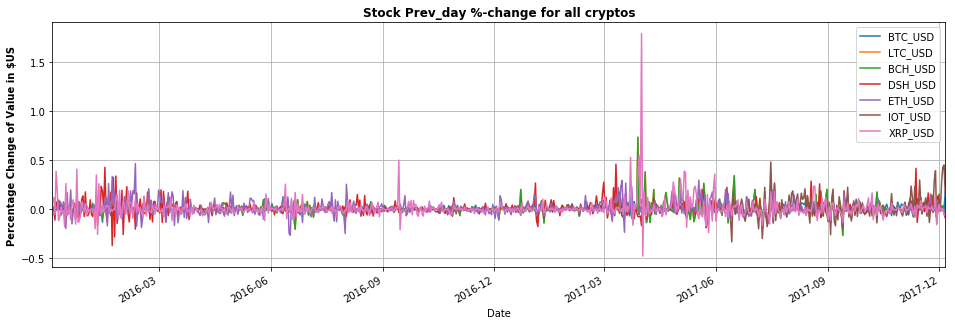

In [12]:
#Testing_Data, checking daily returns over the entire period
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    i["Adj Close"].pct_change().plot(figsize=(16,5), grid=True)
    plt.title(u"Stock Prev_day %-change for all cryptos", weight='bold')
    plt.ylabel("Percentage Change of Value in $US",weight='bold')
    plt.legend(Coin_list_str)

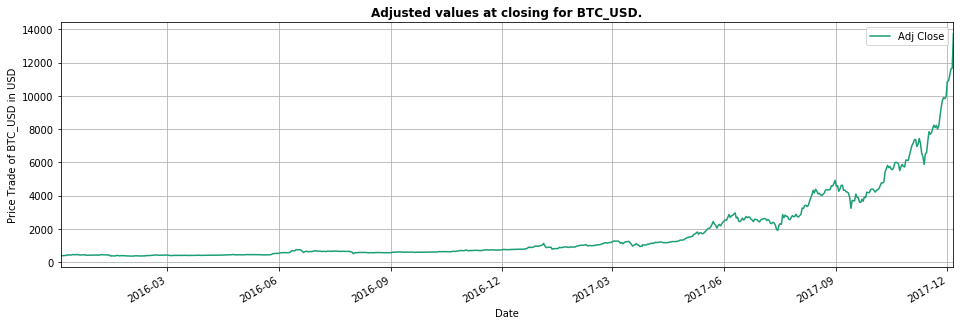

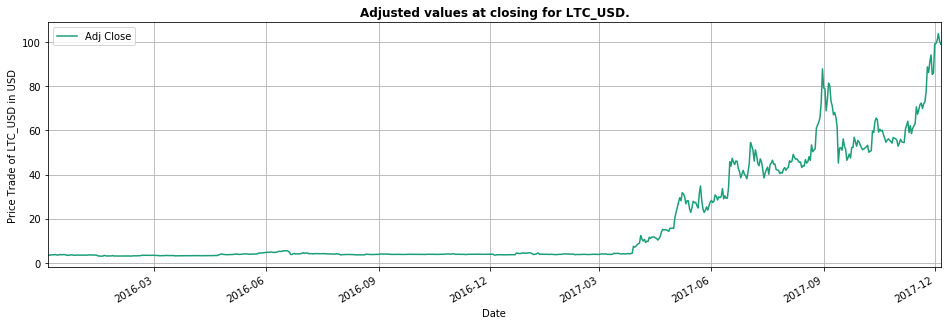

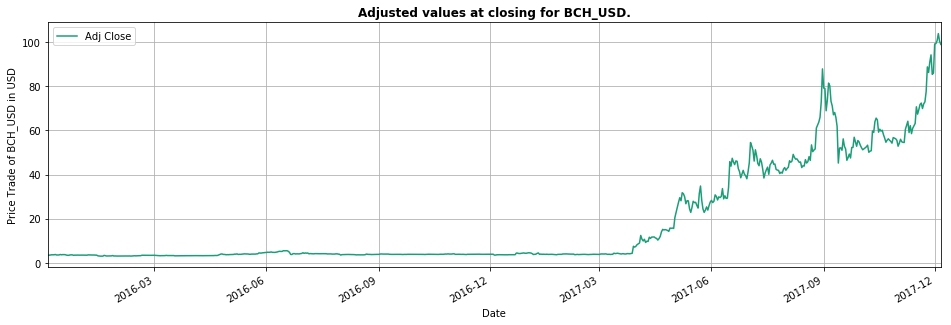

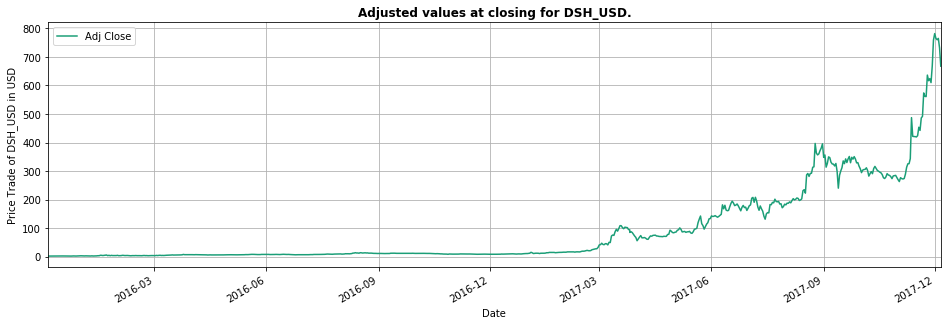

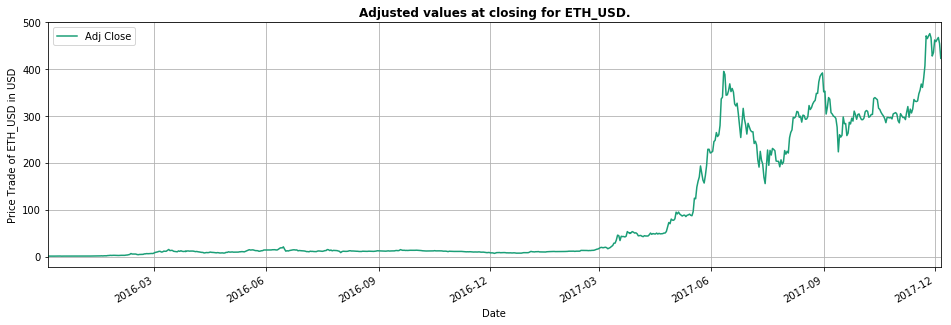

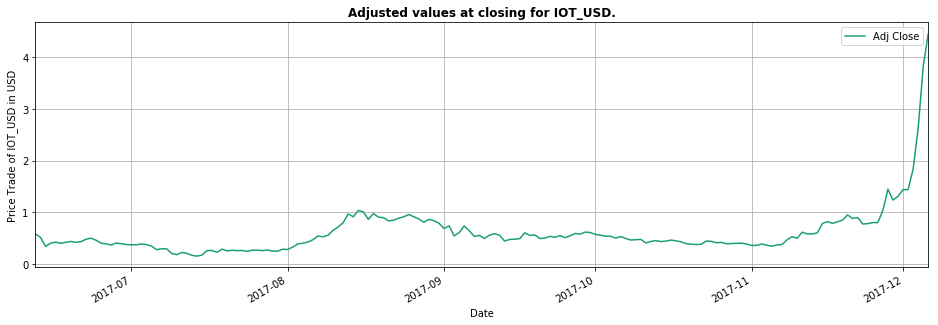

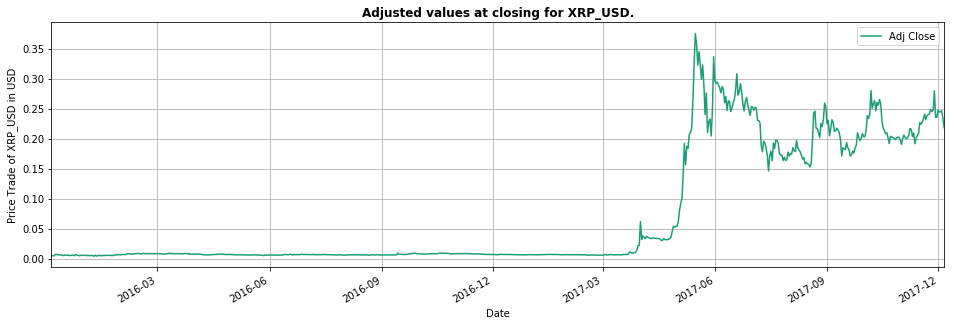

In [13]:
#Testing_Data_with _Ploting in loop for Adjusted close
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    i.plot(y="Adj Close",figsize=(16,5), grid=True, colormap='Dark2')
    plt.title("Adjusted values at closing for " + j + "." , weight='bold')
    plt.ylabel("Price Trade of " + j +" in USD")

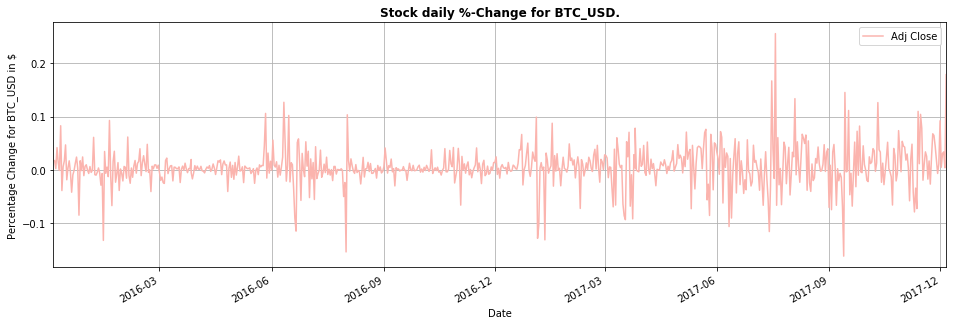

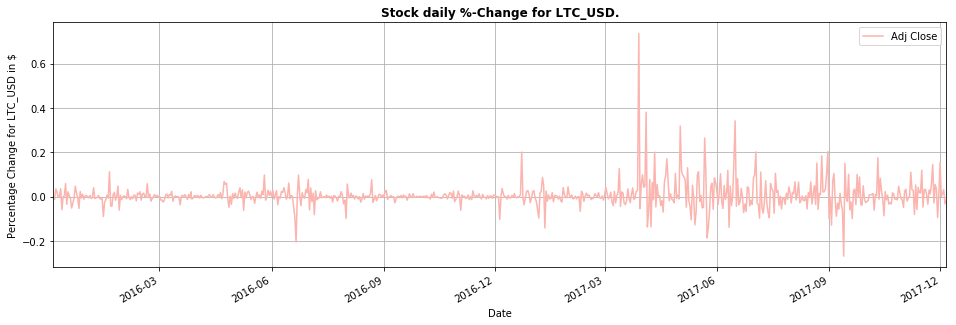

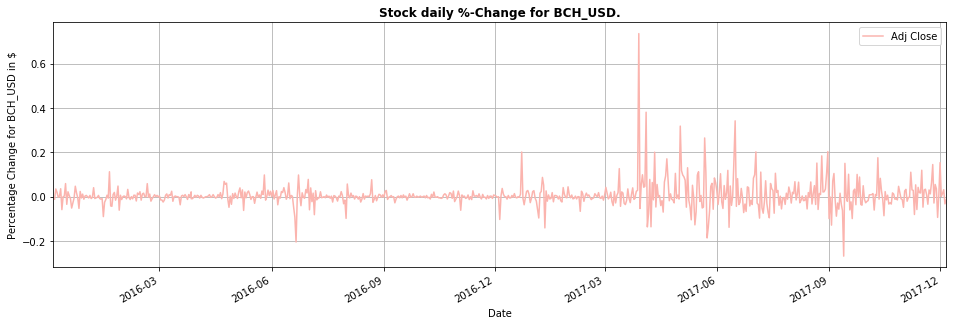

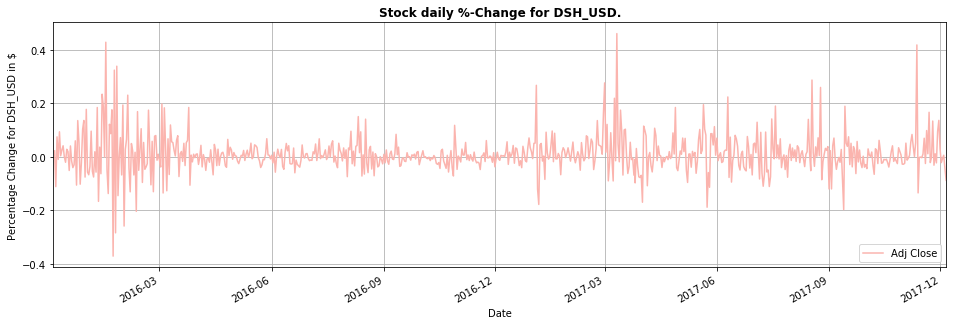

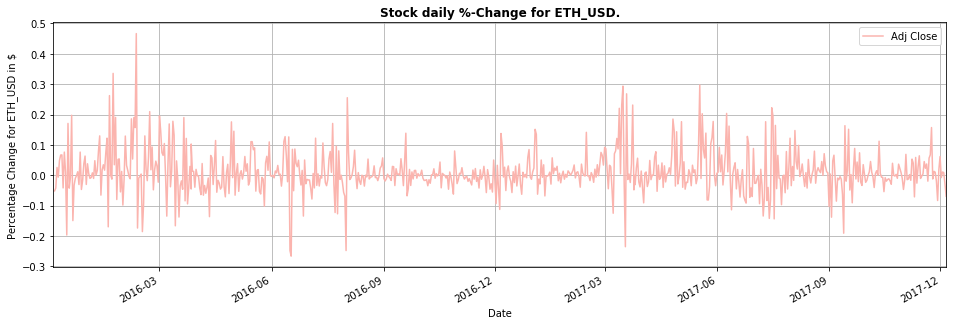

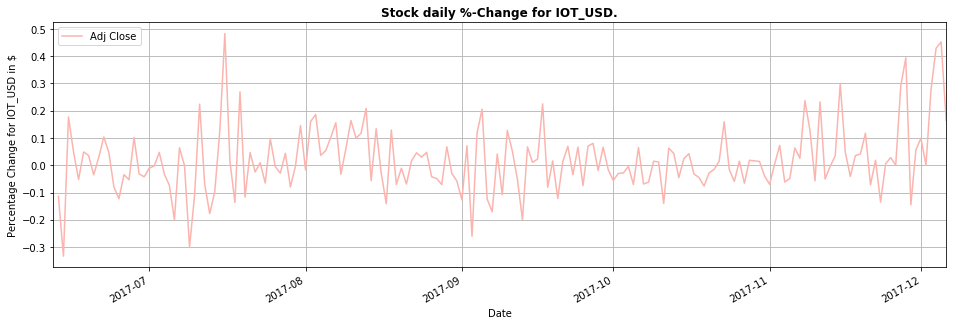

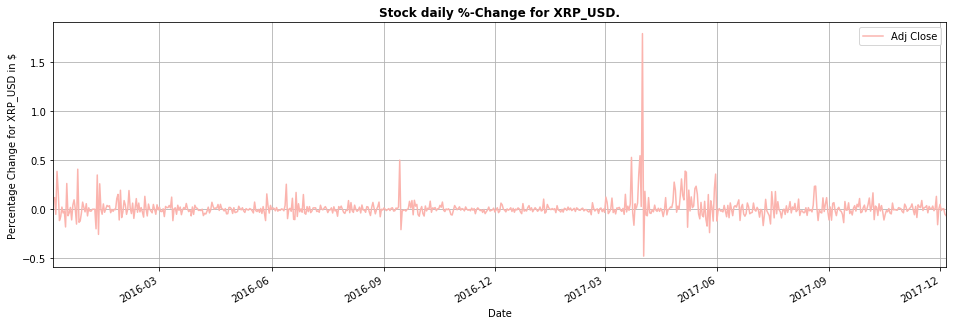

In [14]:
#Testing_Data_with _Ploting in loop
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    fig = plt.figure()
    i["Adj Close"].pct_change().plot(figsize=(16,5), grid=True, colormap='Pastel1')
    plt.title(u"Stock daily %-Change for "+ j + ".", weight='bold')
    plt.ylabel("Percentage Change for " + j +" in $")
    plt.legend()

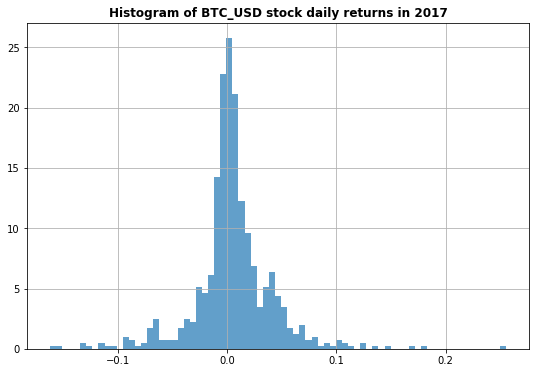

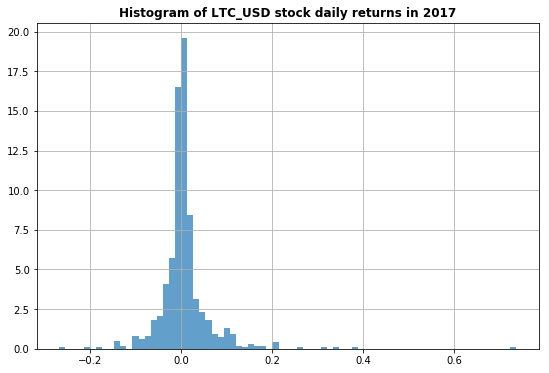

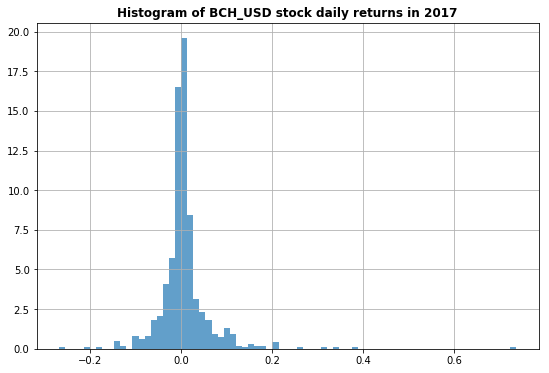

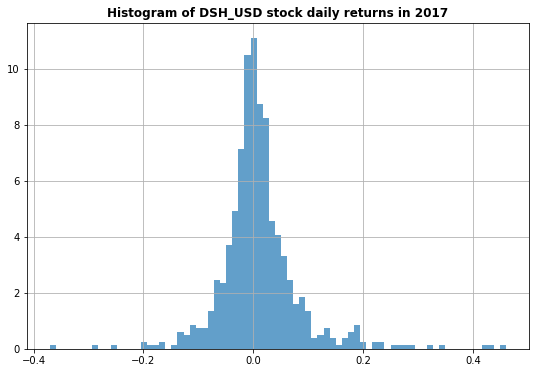

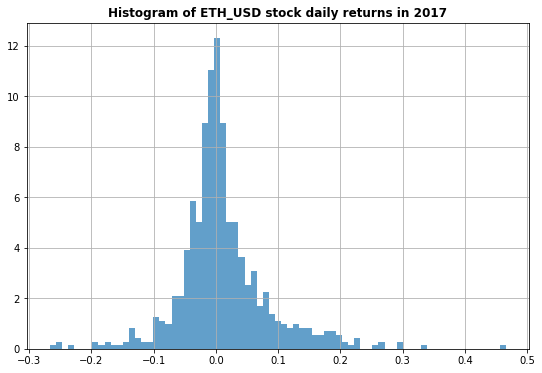

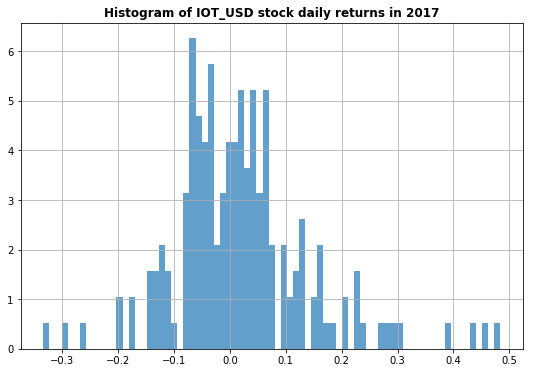

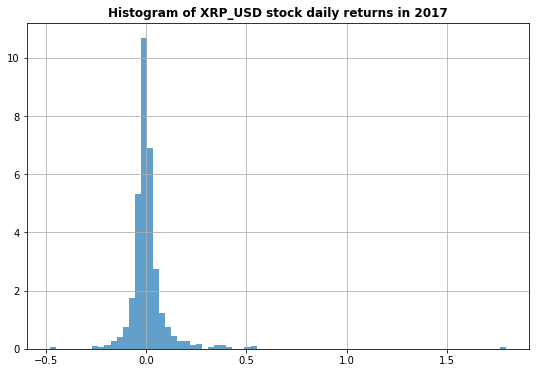

In [15]:
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    fig = plt.figure()
    i["Adj Close"].pct_change().hist(bins=75, normed=True, histtype='stepfilled', alpha=0.7,figsize=(9,6))
    plt.title(u"Histogram of "+j+" stock daily returns in 2017", weight='bold')
    i["Adj Close"].pct_change().std()

In [16]:
#Correlation between the stocks for with %change. 
df = DataFrame({ 'BTC_USD': BTC_USD["Close"].pct_change(),
                 'IOT_USD': IOT_USD["Close"].pct_change(),
                 'LTC_USD': LTC_USD["Close"].pct_change(),
                 'BCH_USD': BCH_USD["Close"].pct_change(),
                 'XRP_USD': XRP_USD["Close"].pct_change(),
                 'ETH_USD': ETH_USD["Close"].pct_change(),
                 'DSH_USD': DSH_USD["Close"].pct_change()})
dfna = df.dropna()

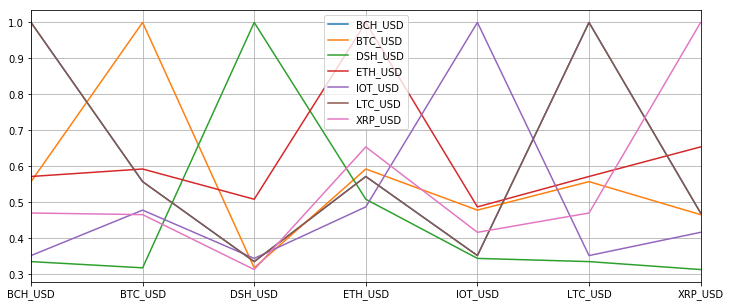

In [17]:
dfna.corr(method='pearson').plot(figsize=(12,5), grid=True)

In [18]:
#Correlation between the stocks
df = DataFrame({ 'BTC_USD': BTC_USD["Close"],
                 'IOT_USD': IOT_USD["Close"],
                 'LTC_USD': LTC_USD["Close"],
                 'BCH_USD': BCH_USD["Close"],
                 'XRP_USD': XRP_USD["Close"],
                 'ETH_USD': ETH_USD["Close"],
                 'DSH_USD': DSH_USD["Close"]})
dfna = df.dropna()

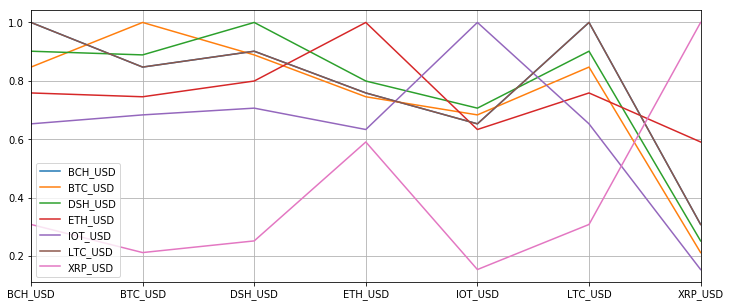

In [19]:
dfna.corr(method='pearson').plot(figsize=(12,5), grid=True)

In [20]:
dfna.head(10)

,BCH_USD,BTC_USD,DSH_USD,ETH_USD,IOT_USD,LTC_USD,XRP_USD
Date,,,,,,,
2017-06-12,30.379999,2712.989990,180.210007,388.089996,0.5870,30.379999,0.2626
2017-06-13,29.190001,2467.270020,163.259995,343.839996,0.5202,29.190001,0.2623
2017-06-14,29.290001,2442.459961,161.080002,344.679993,0.3467,29.290001,0.2450
2017-06-15,34.119999,2508.580078,162.179993,353.609985,0.4082,34.119999,0.2506
2017-06-16,45.799999,2655.100098,175.270004,368.100006,0.4280,45.799999,0.2597
2017-06-17,43.799999,2539.560059,187.059998,351.529999,0.4056,43.799999,0.2651
2017-06-18,47.369999,2616.820068,194.500000,358.200012,0.4254,47.369999,0.2810
2017-06-19,45.680000,2754.379883,188.169998,350.529999,0.4405,45.680000,0.3080
2017-06-20,44.500000,2677.620117,178.960007,325.299988,0.4250,44.500000,0.2726


# Estimating Value at Risk (VaR) using Monte-Carlo simulation